# Programming for Data Analysis - Project 2

## Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project

- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency.


## Project Overview
***

## Dataset Overview & Background
***

**Title:** Wisconsin Diagnostic Breast Cancer (WDBC) Dataset includes following information:

**Number of instances:** 569 

**Number of attributes:** 32 (ID, diagnosis, 30 real-valued input features)

**Attribute information:**

1) ID number

2) Diagnosis ()

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
   
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

    
**Missing attribute values:** none

**Class distribution:** 357 benign, 212 malignant

## Libraries & Modules
***

In [1]:
import pandas as pd

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as ss

# Machine Learning
import sklearn as skl

## Dataset Import and Set Up
***

### Dataset Import

In [2]:
file = 'data/diagnostic.data'

data = pd.read_csv(file, header=None)
# print (data)

### Variables Set Up

In [3]:
idd = 'id'
dia = 'diagnosis'
m1 = 'radius_mean'
m2 = 'texture_mean'
m3 = 'perimeter_mean'
m4 = 'area_mean'
m5 = 'smoothness_mean'
m6 = 'compactness_mean'
m7 = 'concavity_mean'
m8 = 'concave_points_mean'
m9 = 'symmetry_mean'
m10 = 'fractal_dimension_mean'
s1 = 'radius_se' # se = standard error
s2 = 'texture_se'
s3 = 'perimeter_se'
s4 = 'area_se'
s5 = 'smoothness_se'
s6 = 'compactness_se'
s7 = 'concavity_se'
s8 = 'concave_points_se'
s9 = 'symmetry_se'
s10 = 'fractal_dimension_se'
w1 = 'radius_worst' # worst = 'worst' or largest mean
w2 = 'texture_worst'
w3 = 'perimeter_worst'
w4 = 'area_worst'
w5 = 'smoothness_worst'
w6 = 'compactness_worst'
w7 = 'concavity_worst'
w8 = 'concave_points_worst'
w9 =  'symmetry_worst'
w10 = 'fractal_dimension_worst'
    
columns = [
    idd, dia, 
    m1, m2, m3, m4, m5, m6, m7, m8, m9, m10,
    s1, s2, s3, s4, s5, s6, s7, s8, s9, s10,
    w1, w1, w3, w4, w5, w6, w7, w8, w9, w10
    ]

# Adding column names
data.columns = columns

print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  radius_worst  perimeter_worst  area_wors

## Data Clean-up

In [4]:
# Dropping 'id' column. Not relevant for calculations.
data2 = data.drop(idd, axis=1)

In [42]:
# Separating Means data

data_list = list(data2.columns[0:11])
data_means = data2[data_list]
print(data_means.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  
0         0.2419                 0.07871  
1         0.1812                 0.0

## Classifiers
***

- literature review
- performance

## Exploratory Data Analysis
***

In [31]:
# Setting style for plots.

pal = ("dodgerblue", "mediumorchid", "teal", "slateblue")
ss.set(style="darkgrid", palette=pal)

### Data Overview

In [32]:
print (data2.sample(5))

    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
10          M        16.02         23.24          102.70      797.8   
526         B        13.46         18.75           87.44      551.1   
83          M        19.10         26.29          129.10     1132.0   
393         M        21.61         22.28          144.40     1407.0   
208         B        13.11         22.54           87.02      529.4   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
10           0.08206           0.06669         0.03299              0.03323   
526          0.10750           0.11380         0.04201              0.03152   
83           0.12150           0.17910         0.19370              0.14690   
393          0.11670           0.20870         0.28100              0.15620   
208          0.10020           0.14830         0.08705              0.05102   

     symmetry_mean  ...  radius_worst  radius_worst  perimeter_worst  \
10          0.1528  ...   

### Basic Information

Concise summary the dataset incl. number of entries, number and names of columns, type of data, and Null values.

In [33]:
print (data2.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

#### Data Insights

1. There is a total of 569 data entries 
2. Data set does not include any Null values.
3. There is a total of 32 columns of 3 data types: 

    - 30 columns with float values
    - 1 column with object values

In [34]:
# Changing object to int
# data2[dia] = data2[dia].map({'M':1,'B':0}) 

### Diagnosis and Dataset Balance

In [35]:
# Grouping and adding up all instances of each diagnosis.

print(data2[dia].value_counts()) 

B    357
M    212
Name: diagnosis, dtype: int64


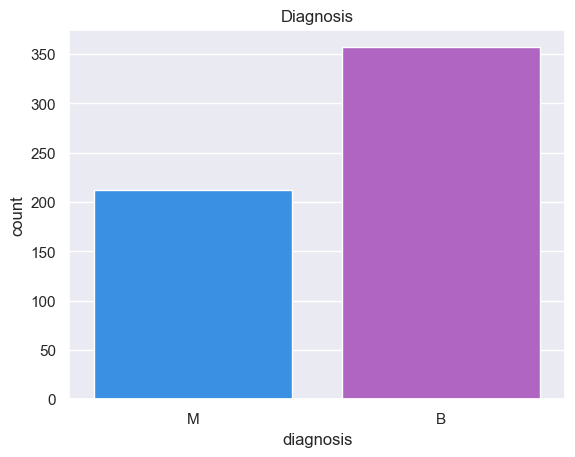

In [36]:
fig, ax = plt.subplots()
plt.title('Diagnosis')
ss.countplot(x=dia, data=data2)
plt.show()

#### Data Insights

Out of 569 entries 357 were cathegorised as benign and 212 as malignant.

###  Descriptive Statistical Overview

In [43]:
# Description of features' means. 

print(data_means.describe())


       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

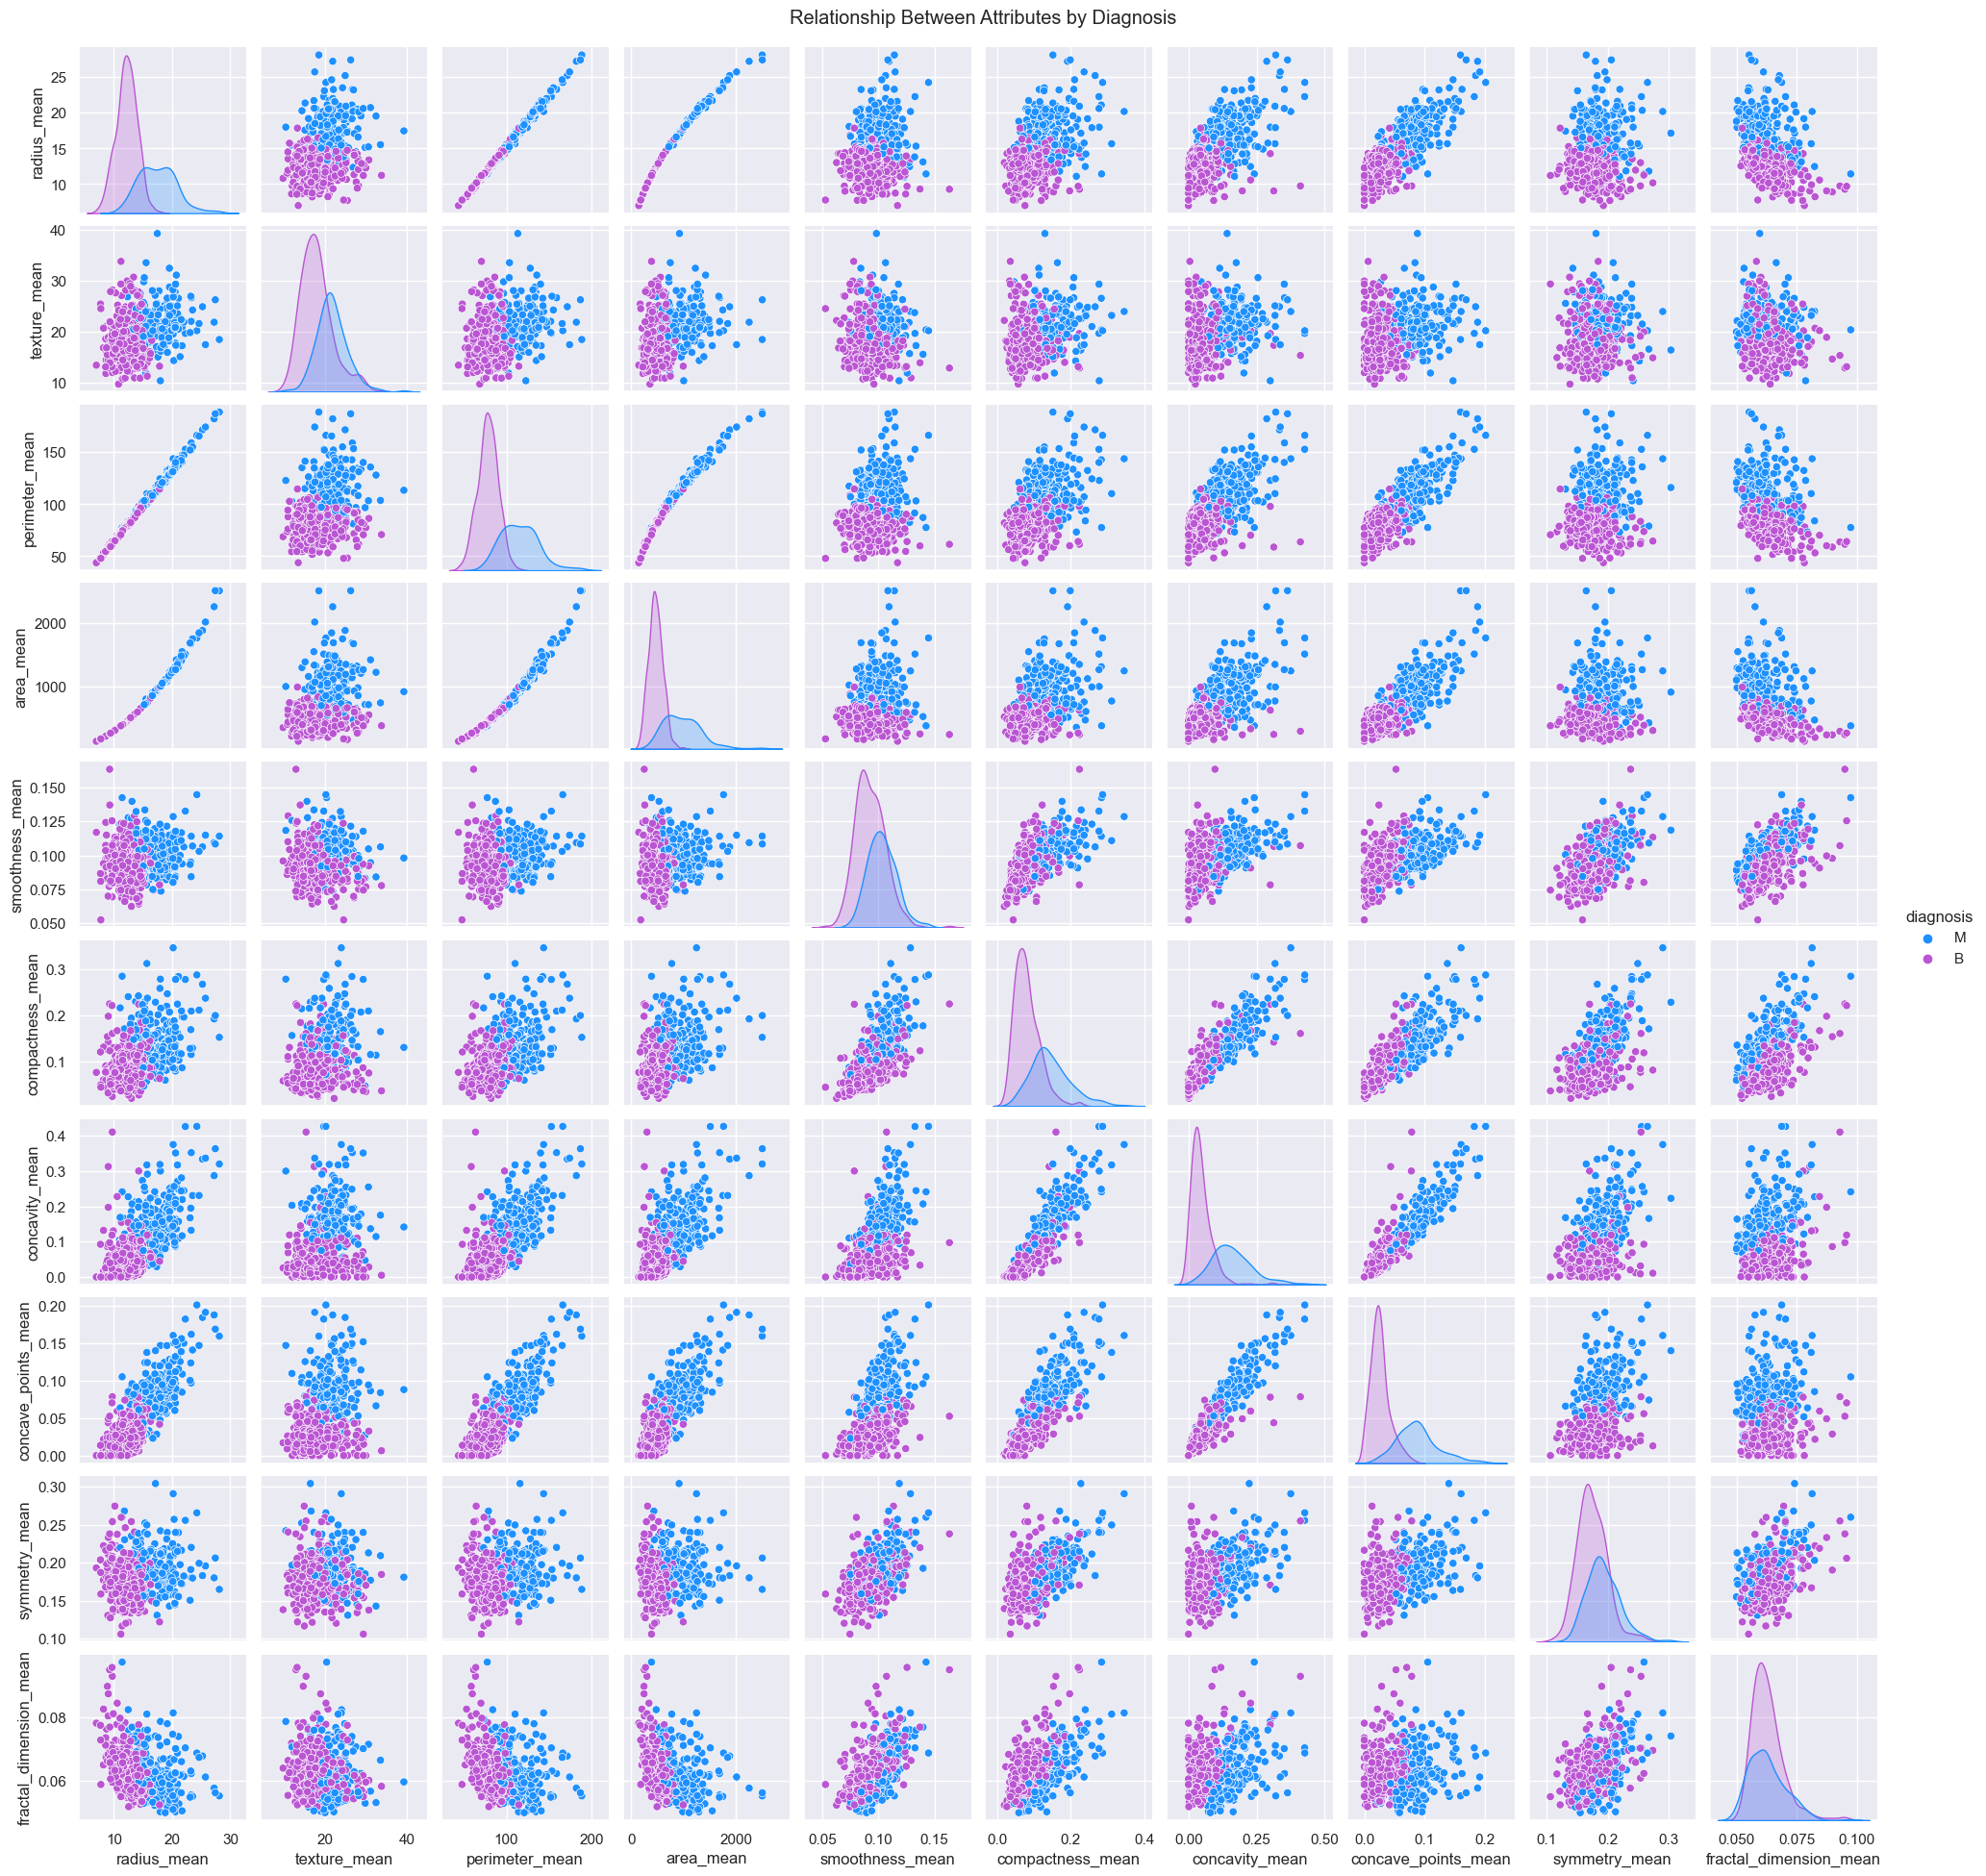

In [45]:
ss.pairplot(data=data_means, hue=dia, height=2, palette=pal)
plt.subplots_adjust(top=0.96)
plt.suptitle('Relationship Between Attributes by Diagnosis')
plt.show()

### Median Values

In [46]:
# Dropping non_numerical column- 'diagnosis'
print(data_means.median(numeric_only=True))

radius_mean                13.37000
texture_mean               18.84000
perimeter_mean             86.24000
area_mean                 551.10000
smoothness_mean             0.09587
compactness_mean            0.09263
concavity_mean              0.06154
concave_points_mean         0.03350
symmetry_mean               0.17920
fractal_dimension_mean      0.06154
dtype: float64


## Mean by Diagnosis

In [48]:
print(data_means.groupby(dia).mean(numeric_only=True))

           radius_mean  texture_mean  perimeter_mean   area_mean  \
diagnosis                                                          
B            12.146524     17.914762       78.075406  462.790196   
M            17.462830     21.604906      115.365377  978.376415   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                 0.092478          0.080085        0.046058   
M                 0.102898          0.145188        0.160775   

           concave_points_mean  symmetry_mean  fractal_dimension_mean  
diagnosis                                                              
B                     0.025717       0.174186                0.062867  
M                     0.087990       0.192909                0.062680  


### Correlation Between Atributes

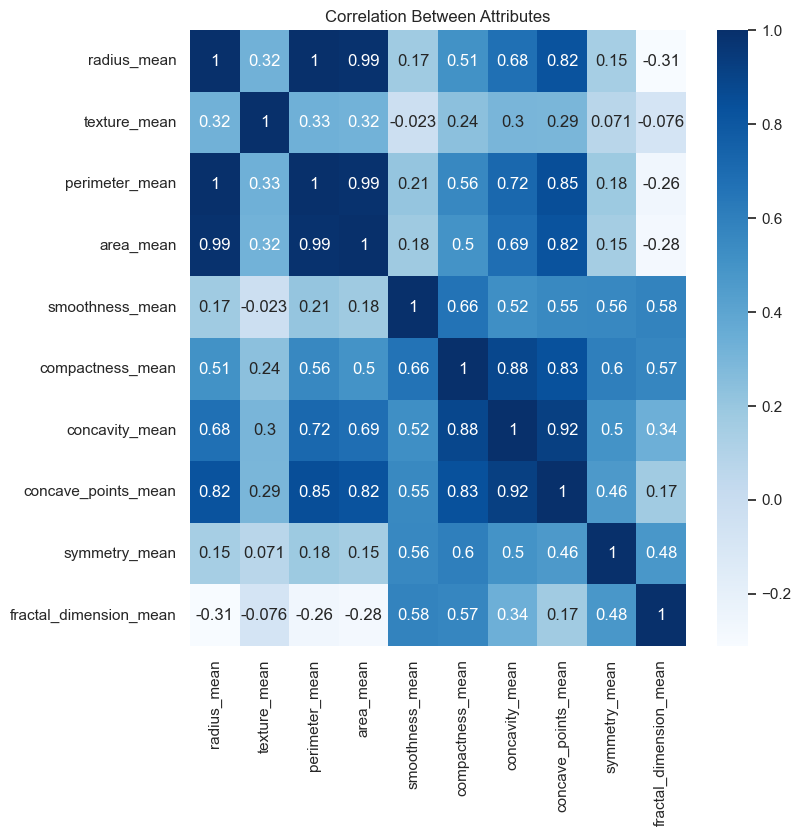

In [49]:
# Heatmap of correlations between attributes
plt.figure(figsize=(8,8))
ss.heatmap(data_means.corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Attributes')
plt.show()

### Correlation Between Atributes by Diagnosis

In [51]:
print(data_means.groupby(dia).corr())

                                  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                                     
B         radius_mean                1.000000     -0.037150        0.996769   
          texture_mean              -0.037150      1.000000       -0.039923   
          perimeter_mean             0.996769     -0.039923        1.000000   
          area_mean                  0.994435     -0.039055        0.990653   
          smoothness_mean           -0.185118     -0.233814       -0.148729   
          compactness_mean           0.060442     -0.058695        0.135411   
          concavity_mean             0.086757     -0.023084        0.147612   
          concave_points_mean        0.411845     -0.142535        0.465519   
          symmetry_mean             -0.235576     -0.068707       -0.208957   
          fractal_dimension_mean    -0.533492     -0.089063       -0.479521   
M         radius_mean                1.000000      0

In [54]:
# defining function for histograms - attributes by species
def histogram_plot(p1, p2, p3):
    
    ss.histplot(data = B[p1], color = 'teal') 
    ss.histplot(data = M[p1], color = 'mediumorchid')
    plt.xlabel(p2)
    plt.ylabel('Count')
    plt.title('Histogram of ' + p2 + ' by Diagnosis') 
    plt.legend(['benign', 'malignant'])
    plt.show()


def histograms():
    histogram_plot(m1, m1, 'radius_mean') 
    histogram_plot(m2, m2, 'texture_mean')
    histogram_plot(m3, m3, 'perimeter_mean')
    histogram_plot(m4, m4, 'area_mean')
    histogram_plot(m5, m5, 'smoothness_mean')
    histogram_plot(m6, m6, 'compactness_mean') 
    histogram_plot(m7, m7, 'concavity_mean')
    histogram_plot(m8, m8, 'concave_points_mean') 
    histogram_plot(m9, m9, 'symmetry_mean')
    histogram_plot(m10, m10, 'fractal_dimension_mean')

histograms()
plt.show()

NameError: name 'B' is not defined

## Statystical Analysis of the Dataset
***

## Machine Learning
***

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers
- Compare, contrast and critique your results with reference to the literature

## Data Synthesis
***

- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints

## References
***

Pandas (2022). *DataFrame.* Online at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.median.html

UCI (1995). *Breast Cancer Wisconsin (Diagnostic) Data Set.* https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)